In [7]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

Agglomerative Clustering:

- using bottom up approach
- So, initially every point on its own is a cluster.
- Find the closest points and group two to form a cluster.
- compare distance between all the point and the keep clustering till thre is only 1 full cluster
- this is computationally expensive
- once a pairing is done you cannot undo it unless it is modeled form scratch again

In [27]:
df = pd.read_csv('shopping-data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [29]:
df.drop("CustomerID", axis=1, inplace=True)

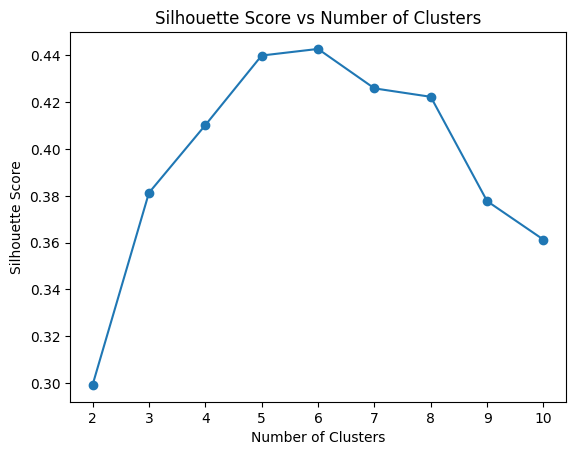

In [33]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette score for different number of clusters
silhouette_scores = []
for n in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = clustering.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [43]:
clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')
clustering.fit(df)
labels_=clustering.fit_predict(df)

In [44]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

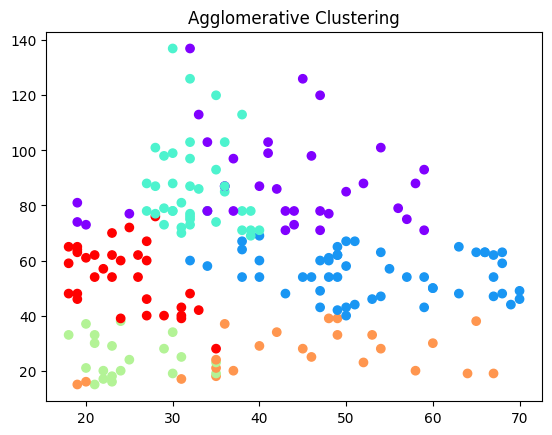

In [45]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=clustering.labels_, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.show()

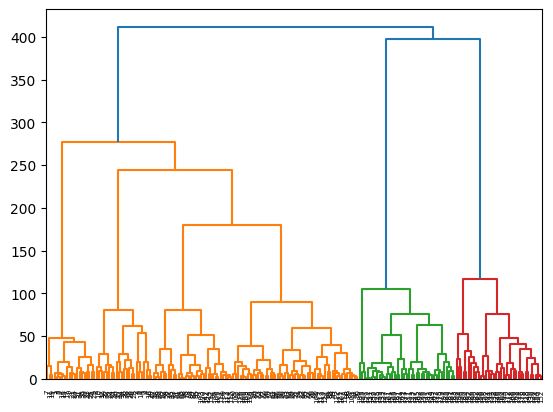

In [41]:
linked = linkage(df, 'ward')
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.show()